# Requirements

In [26]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import random

# Maze

We define a class to represent a maze.  The maze is represented as a set of walls.  The walls are generated randomly according to two probabilities, one for horizontal, one for vertical walls.

In [2]:
class Maze:
    '''Maze to be traversed from top to botoom
    '''
    
    def __init__(self, h_prob, v_prob, width=10, height=10):
        '''Maze constructor
        
        Parameters
        ----------
        h_prob: float
            probability that a horizontal wall will be present
        v_prob: float
            probability that a vertical wall will be present
        width: int
            number of "rooms" in the horizontal direction
        height: int
            number of "rooms' in the vertical direction
            
        Returns
        -------
        Maze
            randomly generated maze"
        '''
        self._orig_width = width
        self._orig_height = height
        self._delta = 2
        self._width = width*self._delta
        self._height = height*self._delta
        self._walls = set()
        for y in range(0, self._height, self._delta):
            self._walls.add(((0, y), (0, y + self._delta)))
            self._walls.add(((self._width, y), (self._width, y + self._delta)))
            for x in range(0, self._width, self._delta):
                if random.random() <= h_prob:
                    self._walls.add(((x, y), (x + self._delta, y)))
                if random.random() <= v_prob:
                    self._walls.add(((x, y), (x, y + self._delta)))
        for x in range(0, self._width, self._delta):
            if random.random() <= h_prob:
                self._walls.add(((x, self._height), (x + self._delta, self._height)))

    @property
    def width(self):
        '''wdith of the maze
        '''
        return self._orig_width
    
    @property
    def height(self):
        '''height of the maze
        '''
        return self._orig_height
    
    @property
    def delta(self):
        '''delta value to ensure ingeger coordiantes
        '''
        return self._delta
    
    @property
    def walls(self):
        '''walls of the maze
        '''
        return self._walls.copy()
    
    def is_open(self, x_start, y_start, direction):
        '''check whether at a given point the direction in the maze is open
        
        Parameters
        ----------
        x_start: int
            x-coordinate of the point in the maze to consider
        y_start: int
            y-coordinate of the point in the maze to consider
        direction: str
            direction to look to, eithter 'up', 'right', 'down', or 'left'
        
        Returns
        -------
        boolean
            True if a move can be make in the given direction, false otherwise
        '''
        if direction == 'up':
            maze_wall = ((x_start - self._delta//2, y_start + self._delta//2), (x_start + self._delta//2, y_start + self._delta//2))
        elif direction == 'right':
            maze_wall = ((x_start + self._delta//2, y_start - self._delta//2), (x_start + self._delta//2, y_start + self._delta//2))
        elif direction == 'down':
            maze_wall = ((x_start - self._delta//2, y_start - self._delta//2), (x_start + self._delta//2, y_start - self._delta//2))
        elif direction == 'left':
            maze_wall = ((x_start - self._delta//2, y_start - self._delta//2), (x_start - self._delta//2, y_start + self._delta//2))
        else:
            raise ValueError(f'invalid direction {direction}')
        return maze_wall not in self._walls
    
    @property
    def entrances(self):
        '''entrances to the maze, i.e., the top "rooms" that can be entered
        '''
        points = []
        y = self._height - 1
        for x in range(1, self._width, self._delta):
            if self.is_open(x, y, 'up'):
                points.append((x, y))
        return points
    
    @property
    def exits(self):
        '''exits of the maze, i.e., the bottom "rooms" that can be exited
        '''
        points = []
        y = 1
        for x in range(1, self._width, self._delta):
            if self.is_open(x, y, 'down'):
                points.append((x, y))
        return points

    def is_inside(self, x, y):
        '''check whether a point is inside the maze
        
        Parameters
        ----------
        x: int
            x-coordinate of the point
        y: int
            y-coordinate of the point
            
        Returns
        -------
        boolean
            true if the point is insize the maze, false otherwise
        '''
        return 0 <= x <= self._width and 0 <= y <= self._height
    
    def move(self, x_start, y_start, direction):
        '''make a move from a given point in the maze in a given direction
        
        Parameters
        ----------
        x_start: int
            x-coordinate of the starting point
        y_start: int
            y-coordinate of the starting point
        direction: str
            direction to move in, can be 'up', 'right', 'down', 'left'
            
        Returns
        -------
        tuple
            new x- and y-coordinates
        '''
        if direction == 'up':
            return (x_start, y_start + self._delta)
        if direction == 'right':
            return (x_start + self._delta, y_start)
        if direction == 'down':
            return (x_start, y_start - self._delta)
        if direction == 'left':
            return (x_start - self._delta, y_start)
        raise ValueError(f'invalid direction {direction}')

Note that there are smarter ways to generate mazes, see [Wikipedia](https://en.wikipedia.org/wiki/Maze_generation_algorithm) for a nice overview.

For convenience, define a function to visualize the maze.

In [3]:
def plot_maze(maze):
    '''visualize the maze
    
    Parameters
    ----------
    maze: Maze
        maze to visualize
        
    Returns
    -------
    tuple
        figure and axes of the plot
    '''
    line_collection = LineCollection(maze.walls)
    figure, axes = plt.subplots(figsize=(15, 15))
    axes.add_collection(line_collection)
    axes.autoscale()
    axes.set_xticks([x for x in range(1, maze.width*maze.delta, maze.delta)])
    axes.set_yticks([x for x in range(1, maze.height*maze.delta, maze.delta)])
    axes.set_aspect('equal')
    return figure, axes

## Tests

Create and visualize a maze.

In [4]:
maze = Maze(0.2, 0.8)

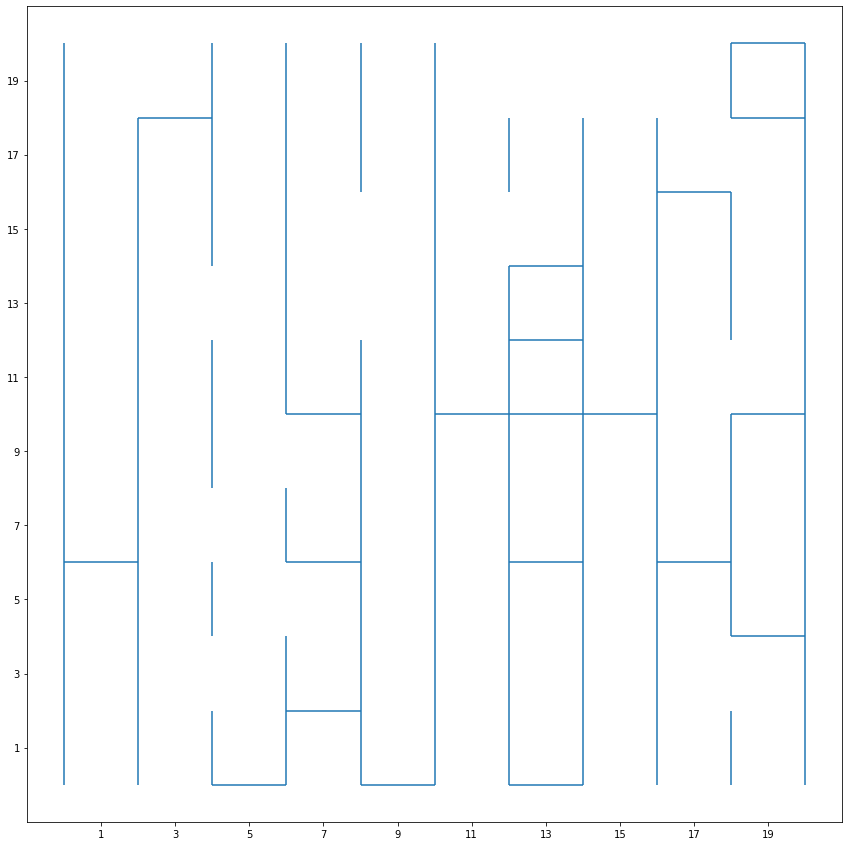

In [5]:
_ = plot_maze(maze)

Check the `is_open` method on an example.

In [6]:
coords = (15, 7)
for direction in ['up', 'right', 'down', 'left']:
    print(f'{direction:6s}: {maze.is_open(*coords, direction)}')

up    : True
right : False
down  : True
left  : False


Check the entrances to and the exits from the maze.

In [7]:
maze.entrances

[(1, 19),
 (3, 19),
 (5, 19),
 (7, 19),
 (9, 19),
 (11, 19),
 (13, 19),
 (15, 19),
 (17, 19)]

In [8]:
maze.exits

[(1, 1), (3, 1), (7, 1), (11, 1), (15, 1), (17, 1), (19, 1)]

# Solving the maze

Define a strategy to solve the maze, in this case a breadth-first search.  The function will return the first path that reaches an exit.

In [9]:
def solve_bfs(maze):
    '''find a path to traverse the maze from an entrance to an exit
    
    Parameters
    ----------
    maze: Maze
        maze to solve
        
    Returns
    -------
    list
        a list of x-y tuples that representa a path thought the maze, None if no such
        path exists
    '''
    paths = [[point] for point in maze.entrances]
    visited = {point for point in maze.entrances}
    new_paths = []
    progress = True
    while progress:
        progress = False
        for path in paths:
            last_point = path[-1]
            if last_point in maze.exits:
                return path
            for direction in ['up', 'right', 'down', 'left']:
                x_next, y_next = maze.move(*last_point, direction)
                if not maze.is_inside(x_next, y_next) or (x_next, y_next) in visited:
                    continue
                if maze.is_open(*last_point, direction):
                    new_paths.append(path + [(x_next, y_next)])
                    visited.add((x_next, y_next))
                    progress = True
        paths = new_paths
    return None

Define a function to visualize the maze and the path through it.

In [10]:
def plot_maze_path(maze, path):
    '''visualize the maze and a path
    
    Parameters
    ----------
    maze: Maze
        maze to visualize
    path: list
        path to visualize
    '''
    path_collection = LineCollection([path], colors=['red'], linewidth=3)
    figure, axes = plot_maze(maze)
    axes.add_collection(path_collection)

Since not all randomly generated mazes can be solved, keep on generating mazes until one is found that can be solved.

1 attempts


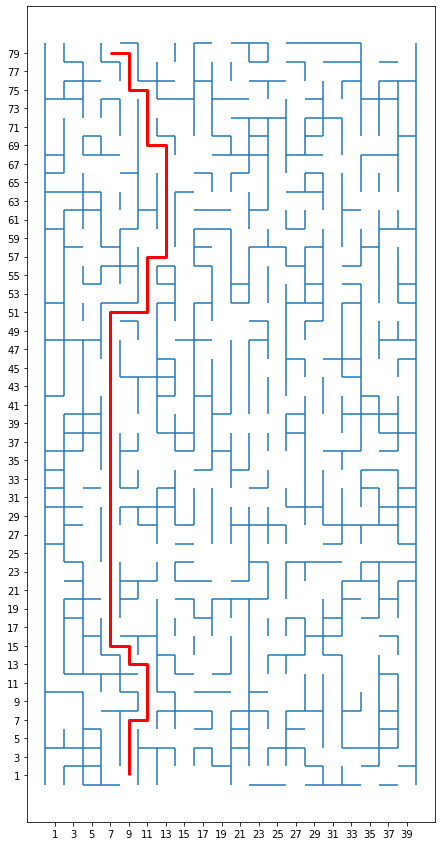

In [11]:
attempts= 0
while True:
    attempts += 1
    maze = Maze(0.4, 0.6, width=20, height=40)
    path = solve_bfs(maze)
    if path is not None:
        plot_maze_path(maze, path)
        print(f'{attempts} attempts')
        break

# Statistics

How does the success rate change with respect to the wall probability or the size of the maze?

In [35]:
def prob_stats(prob_start, prob_end, prob_delta, size=10, max_attempts=10_000):
    '''check the impact of the probability on whether a solution can be found
    
    Parameters
    ----------
    prob_start: float
        start probability
    prob_end: float
        end probability
    prob_delta: float
        probability increment
    size: int
        size of the maze
    max_attempts: int
        maximum number of attempts to create a maze that can be solved
        
    Returns
    -------
    dict
        the results encoded as a dictrionary with the probability as the key, and a list of attemtps as values
    '''
    tries = {}
    for prob in np.arange(prob_start, prob_end, prob_delta):
        tries[prob] = []
        for _ in range(10):
            attempts = 0
            while attempts <= max_attemts:
                attempts += 1
                maze = Maze(prob, prob, width=size, height=size)
                path = solve_bfs(maze)
                if path is not None:
                    tries[prob].append(attempts)
                    break
        print(f'{prob:.2f}: {tries[prob]}')
        if not tries[prob]:
            break
    return tries

In [36]:
prob_stats(0.5, 0.8, 0.02, max_attempts=50_000)

0.50: [1, 5, 1, 7, 2, 1, 1, 4, 4, 3]
0.52: [6, 1, 10, 1, 6, 1, 7, 3, 2, 3]
0.54: [1, 1, 3, 4, 3, 1, 4, 1, 4, 4]
0.56: [8, 1, 1, 8, 1, 3, 14, 5, 3, 18]
0.58: [9, 22, 13, 37, 10, 17, 10, 12, 1, 30]
0.60: [42, 4, 6, 41, 9, 5, 12, 1, 7, 6]
0.62: [143, 36, 55, 11, 15, 8, 15, 7, 20, 43]
0.64: [56, 52, 103, 116, 18, 26, 64, 14, 35, 5]
0.66: [67, 146, 105, 22, 117, 50, 29, 55, 405, 39]
0.68: [23, 295, 392, 92, 227, 95, 7, 188, 556, 558]
0.70: [229, 505, 845, 1261, 473, 389, 354, 2635, 604, 335]
0.72: [1550, 196, 663, 1603, 1658, 2710, 736, 637, 102, 1215]
0.74: [4949, 962, 2917, 3906, 6944, 193, 4828, 5011, 897]
0.76: [4367, 6644, 2114, 2327]
0.78: [6417, 1761]
0.80: []


{0.5: [1, 5, 1, 7, 2, 1, 1, 4, 4, 3],
 0.52: [6, 1, 10, 1, 6, 1, 7, 3, 2, 3],
 0.54: [1, 1, 3, 4, 3, 1, 4, 1, 4, 4],
 0.56: [8, 1, 1, 8, 1, 3, 14, 5, 3, 18],
 0.5800000000000001: [9, 22, 13, 37, 10, 17, 10, 12, 1, 30],
 0.6000000000000001: [42, 4, 6, 41, 9, 5, 12, 1, 7, 6],
 0.6200000000000001: [143, 36, 55, 11, 15, 8, 15, 7, 20, 43],
 0.6400000000000001: [56, 52, 103, 116, 18, 26, 64, 14, 35, 5],
 0.6600000000000001: [67, 146, 105, 22, 117, 50, 29, 55, 405, 39],
 0.6800000000000002: [23, 295, 392, 92, 227, 95, 7, 188, 556, 558],
 0.7000000000000002: [229, 505, 845, 1261, 473, 389, 354, 2635, 604, 335],
 0.7200000000000002: [1550, 196, 663, 1603, 1658, 2710, 736, 637, 102, 1215],
 0.7400000000000002: [4949, 962, 2917, 3906, 6944, 193, 4828, 5011, 897],
 0.7600000000000002: [4367, 6644, 2114, 2327],
 0.7800000000000002: [6417, 1761],
 0.8000000000000003: []}

It is clear that the probability to generate a maze that can be solved drop dramatically in this range of values.

In [40]:
def size_stats(size_start, size_end, size_delta, prob=0.6, max_attempts=10_000):
    '''check the impact of the maze size on whether a solution can be found
    
    Parameters
    ----------
    size_start: float
        start size
    size_end: float
        end size
    size_delta: float
        size increment
    prob: float
        probability for walls
    max_attempts: int
        maximum number of attempts to create a maze that can be solved
        
    Returns
    -------
    dict
        the results encoded as a dictrionary with the sizes as the key, and a list of attemtps as values
    '''

    tries = {}
    for size in range(size_start, size_end, size_delta):
        tries[size] = []
        for _ in range(10):
            attempts = 0
            while attempts <= max_attemts:
                attempts += 1
                maze = Maze(prob, prob, width=size, height=size)
                path = solve_bfs(maze)
                if path is not None:
                    tries[size].append(attempts)
                    break
        print(f'{size:3d}: {tries[size]}')
        if not tries[size]:
            break
    return tries

In [41]:
size_stats(10, 210, 10)

 10: [22, 20, 16, 11, 1, 41, 1, 16, 6, 39]
 20: [115, 88, 124, 288, 7, 280, 230, 128, 44, 207]
 30: [410, 346, 117, 1102, 3018, 1554, 3423, 113, 840, 321]
 40: [1956, 4539, 4767, 7347, 2361, 6256, 7033, 1114]
 50: []


{10: [22, 20, 16, 11, 1, 41, 1, 16, 6, 39],
 20: [115, 88, 124, 288, 7, 280, 230, 128, 44, 207],
 30: [410, 346, 117, 1102, 3018, 1554, 3423, 113, 840, 321],
 40: [1956, 4539, 4767, 7347, 2361, 6256, 7033, 1114],
 50: []}

When the size of the mazes increases, the probability to generate one that has a solution drops sharply.